In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

<span style="color: red;">
<div dir='rtl'>

<b> ŸÜÿßŸÖ Ÿà ŸÜÿßŸÖ‚Äå‚ÄåÿÆÿßŸÜŸàÿßÿØ⁄Ø€å: ÿ≥€åÿØ ÿßÿ≠ÿ≥ÿßŸÜ ÿ≠ÿ≥ŸÜ ÿ®€å⁄Ø€å</b>

<b> ÿ¥ŸÖÿßÿ±Ÿá ÿØÿßŸÜÿ¥ÿ¨Ÿà€å€å: €¥€∞€≤€≤€±€±€∑€≤€≥</b>

</span>

<div dir='rtl'>
<h1> 
ŸÖŸÇÿØŸÖŸá
</h1>
<p>
ÿØÿ± ÿß€åŸÜ ÿ™ŸÖÿ±€åŸÜ ŸÇÿµÿØ ÿØÿßÿ±€åŸÖ ÿ®Ÿá ŸÖÿ®ÿßÿ≠ÿ´ ÿ≤€åÿ± ÿ®Ÿæÿ±ÿØÿßÿ≤€åŸÖ:
<li> ⁄©ÿßŸáÿ¥ ÿßÿ®ÿπÿßÿØ </li>
<li> ÿÆŸàÿ¥Ÿá‚Äåÿ®ŸÜÿØ€å ŸÖÿ™ŸÜ Ÿà Ÿáÿ±ÿ≥‚Äå⁄©ÿ±ÿØŸÜ ÿÆŸàÿ¥Ÿá‚ÄåŸáÿß</li>

⁄©ÿ™ÿßÿ®ÿÆÿßŸÜŸá‚ÄåŸáÿß€å ŸÖŸàÿ±ÿØ ŸÜÿ∏ÿ±ÿ™ÿßŸÜ ÿ±ÿß ŸáŸÖ ŸÖ€å‚Äåÿ™ŸàÿßŸÜ€åÿØ ÿØÿ± ÿßŸàŸÑ€åŸÜ ÿ≥ŸÑ ŸÜŸàÿ™‚Äåÿ®Ÿà⁄© ŸÅÿ±ÿßÿÆŸàÿßŸÜ€å ⁄©ŸÜ€åÿØ. 

ÿ™ŸÖÿ±€åŸÜ ÿØÿ±ÿ®ÿßÿ±Ÿá €å ÿÆŸàÿ¥Ÿá ÿ®ŸÜÿØ€å ÿßŸáŸÜ⁄Ø Ÿáÿß€å ŸÖÿ¥ÿßÿ®Ÿá ÿØÿ± ÿßŸæ ÿßÿ≥Ÿæÿßÿ™€åŸÅÿß€å ÿßÿ≥ÿ™ ⁄©Ÿá ÿßÿ≤ ÿØ€åÿ™ÿßÿ≥ÿ™€å ÿßÿ≤ ÿ≥ÿß€åÿ™ ⁄©⁄ØŸÑ ÿ®ÿ±ÿØÿßÿ¥ÿ™Ÿá ÿ¥ÿØŸá ÿßÿ≥ÿ™.
</p>
</div>

<div dir="rtl">
<h1>
ŸÑŸàÿØ ÿØ€åÿ™ÿß</h1>
</div>

<div dir="rtl">
ÿØÿ± ÿß€åŸÜ ÿ®ÿÆÿ¥ ÿ®ÿß€åÿØ ÿØ€åÿ™ÿß ÿ±ÿß ŸÑŸàÿØ ⁄©ÿ±ÿØŸá Ÿà ÿØÿ± ÿßŸÜÿ™Ÿáÿß ŸÅŸÇÿ∑ ŸÜÿßŸÖ ÿ¢ŸáŸÜ⁄Ø Ÿà ŸÅ€å⁄Üÿ± Ÿáÿß€å€å ⁄©Ÿá ÿ®Ÿá ŸÜÿ∏ÿ±ÿ™ÿßŸÜ ŸÖŸÅ€åÿØ ÿßÿ≥ÿ™ ÿ±ÿß ÿ®ÿß ÿ∞⁄©ÿ± ÿπŸÑÿ™€å ⁄©Ÿàÿ™ÿßŸá ŸÜ⁄ØŸá ÿØÿßÿ±€åÿØ. 
</div>

First we will load the raw data and do some basic preprocessings. In this case we did the following:
- dropped samples which had null values
- merged the samples corresponding to the same song

In [2]:
raw_data = pd.read_csv("datasets/spotify.csv")
raw_data = raw_data.dropna()

# merge rows with the same 'track_id'
# replace numeric columns with the mean
# replace non-numeric columns with the most frequent value
numeric_columns = raw_data.select_dtypes(include=["number"]).columns.tolist()
non_numeric_columns = raw_data.select_dtypes(exclude=["number"]).columns.tolist()
raw_data = raw_data.groupby("track_id", as_index=False).agg(
    {
        **{col: "mean" for col in numeric_columns},
        **{col: lambda x: x.mode().iloc[0] for col in non_numeric_columns},
    }
)

Here, we are eliminating certain columns that do not contribute to clustering:
- all ID columns are excluded as they consist of random strings. They especially hurt our performance due to providing a distinct value for each sample, hence increasing the varaince of the feature.
- all columns displaying names are excluded because they represent distinct values like IDs. (It's worth noting that such features would be beneficial if we were to use some sort of word embeddings, but in this context, they do not contribute meaningfully)
- release date of the song is also excluded, as it does not provide relevant information about the actual song

Another necessary step is to transform categorical features into numeric features, as PCA operates exclusively with numeric features. An important note here is that employing one-hot encoding for this conversion is not viable. One-hot encoding would drastically increase the number of features, contradicting the whole purpose of using PCA, which is to reduce the dimensionality. Moreover, PCA does not perform well with one-hot columns because sparse boolean values increase the variance along their axes.
So we are going to use label encoding.

In [3]:
garbage_cols = ["track_id", "track_album_id", "playlist_id", "playlist_name", "track_album_release_date",
                "track_name", "track_album_name", "playlist_subgenre", "track_artist"]

le_data = raw_data.copy().drop(columns=garbage_cols, axis=1)
non_numeric_columns = le_data.select_dtypes(exclude=["number"]).columns.tolist()
for col in non_numeric_columns:
    le = preprocessing.LabelEncoder()
    le_data[col] = le.fit_transform(le_data[col])

<div dir="rtl">
ÿ™Ÿàÿ∂€åÿ≠ ÿØŸá€åÿØ ⁄©Ÿá ÿØ€åÿ™ÿß€å scale ŸÜÿ¥ÿØŸá ⁄ÜŸá ŸÖÿ¥⁄©ŸÑ€å ŸÖ€åÿ™ŸàÿßŸÜÿØ ÿ®ÿ±ÿß€å ÿÆŸàÿ¥Ÿá ÿ®ŸÜÿØ€å ÿß€åÿ¨ÿßÿØ ⁄©ŸÜÿØ?
<br>
ÿØÿ± ÿß€åŸÜ cell ÿ®ÿß€åÿØ €å⁄© standard scalar ÿ±ÿß ÿßÿ≤ ÿµŸÅÿ± Ÿæ€åÿßÿØŸá ÿ≥ÿßÿ≤€å ŸÜŸÖÿß€å€åÿØ. ÿ™ÿß ÿ®ÿ±ÿß€å ŸÇÿ≥ŸÖÿ™ Ÿáÿß€å ÿ®ÿπÿØ€å €å⁄© ÿØ€åÿ™ÿß€å ŸÖŸÜÿßÿ≥ÿ® ÿØÿßÿ¥ÿ™Ÿá ÿ®ÿßÿ¥€åÿØ.
</div>

Using non-normalized data can hurt the performance of the model. This is especially important in our case where the model relies on distances. If we don't normalize the data, one feature may have significantly larger scale than others, leading it to dominate distance measurements against all other features and disproportionately influencing distance calculations.
To address this issue, we implement standardization as our normalization technique:

In [4]:
def standardize(df, numeric_columns=None):
    if numeric_columns is None:
        numeric_columns = df.select_dtypes(include=["number"]).columns.tolist()

    column_stats = {}
    for col in numeric_columns:
        mean = df[numeric_columns][col].mean()
        std = df[numeric_columns][col].std()
        column_stats[col] = {'mean': mean, 'std': std}

        df[col] = (df[col] - mean) / std

    return df, column_stats

<div dir="rtl">
<h1>
⁄©ÿßŸáÿ¥ ÿßÿ®ÿπÿßÿØ
</h1>
</div>

<div dir="rtl">
€å⁄©€å ÿßÿ≤ ÿ±Ÿàÿ¥‚ÄåŸáÿß€å ⁄©ÿßŸáÿ¥ ÿßÿ®ÿπÿßÿØÿå PCA ÿßÿ≥ÿ™. ÿ®ÿß ÿßÿ≥ÿ™ŸÅÿßÿØŸá ÿßÿ≤ Ÿæ€åÿßÿØŸá‚Äåÿ≥ÿßÿ≤€å ÿ¢ŸÜ ÿØÿ± ⁄©ÿ™ÿßÿ®ÿÆÿßŸÜŸá sklearnÿå ÿßÿ®ÿπÿßÿØ Ÿà€å⁄ò⁄Ø€å‚Äå ÿ±ÿß ⁄©ÿßŸáÿ¥ ÿØŸá€åÿØ.
<br>
ÿ≥Ÿæÿ≥ ÿ®ÿß ÿßÿ≥ÿ™ŸÅÿßÿØŸá ÿßÿ≤ explained_variance_ratio_ ÿØÿ± ÿßŸÑ⁄ØŸàÿ±€åÿ™ŸÖ PCA  ŸÜÿ¥ÿßŸÜ ÿØŸá€åÿØ ⁄©Ÿá ÿ®ÿß Ÿàÿ¨ŸàÿØ €å⁄© ÿ™ÿ±ÿ¥ŸàŸÑÿØ ŸÖŸÜÿßÿ≥ÿ®  ÿ™ÿß ⁄ÜŸá ŸÖ€åÿ≤ÿßŸÜ ŸÖ€åÿ™ŸàÿßŸÜ ÿßÿ®ÿπÿßÿØ Ÿà€å⁄ò⁄Ø€å Ÿáÿß ÿ±ÿß ⁄©ŸÖ ÿ™ÿ± ⁄©ÿ±ÿØ.
<br>
ÿ®ÿ±ÿß€å ÿ™ÿ±ÿ¥ŸàŸÑÿØ€å ⁄©Ÿá ÿßŸÜÿ™ÿÆÿßÿ® ⁄©ÿ±ÿØ€åÿØ ÿØŸÑ€åŸÑ ÿ®€åÿßŸàÿ±€åÿØ Ÿà ÿ¥ŸáŸàÿØ ÿß€åŸÜ ŸÖÿ™ÿ∫€åÿ± ÿ±ÿß ÿ™Ÿàÿ∂€åÿ≠ ÿØŸá€åÿØ.
</div>

A trade-off exists between reducing feature dimensionality and preserving the original information. PCA tries to find new axes called principal components that capture the highest variance in the data. The principal components are ordered by the amount of variance they capture. The explained_variance_ratio_ gives the fraction of the total variance that each principal component represents. This information is useful for understanding how much variance (information) is retained by each component.

The variance for each PC is shown in the plot below. So we can calculate the accumulated variance and choose our threshold based on the amount of variance we want to preserve. In our case we choose the threshold to be 90% of the original information. We can see the gaps keep getting smaller with each PC and we get diminishing returns.

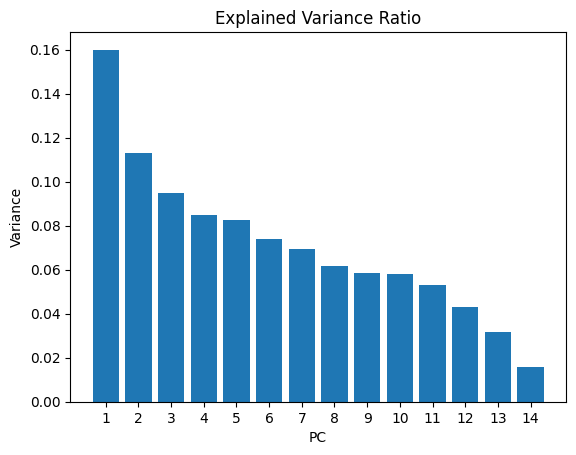

We chose 11 principal componentes
Explained variance ratio for each PC:
[0.16002806 0.11311445 0.09477779 0.085032   0.08269409 0.07383301
 0.0692876  0.06152559 0.05848671 0.05789534 0.05293416]


In [5]:
def reduce_dimension(embedding, n_components=None):
    pca = PCA(n_components)
    pca.fit(embedding)
    return pca.transform(embedding), pca.explained_variance_ratio_


normalized_data, _ = standardize(le_data)
_, evr = reduce_dimension(normalized_data)
plt.bar(range(1, len(evr) + 1), evr)
plt.title("Explained Variance Ratio")
plt.xlabel("PC")
plt.ylabel("Variance")
plt.xticks(range(1, len(evr) + 1))
plt.show()

threshold = .9
latent_data, evr = reduce_dimension(normalized_data, threshold)
print(f"We chose {len(evr)} principal componentes")
print(f"Explained variance ratio for each PC:\n{evr}")

<div dir="rtl">
<h2>
ÿÆŸàÿ¥Ÿá‚Äåÿ®ŸÜÿØ€å
</h2>
</div>

<div dir="rtl">
ÿØÿ± ÿß€åŸÜ ŸÇÿ≥ŸÖÿ™ÿå ÿ¥ŸÖÿß ÿßÿ®ÿ™ÿØÿß ÿßŸÑ⁄ØŸàÿ±€åÿ™ŸÖ ÿÆŸàÿ¥Ÿá‚Äåÿ®ŸÜÿØ€å K-means ÿ±ÿß 
<u><b>ÿßÿ≤ Ÿæÿß€åŸá</b></u>
 Ÿæ€åÿßÿØŸá‚Äåÿ≥ÿßÿ≤€å ŸÖ€å‚Äå⁄©ŸÜ€åÿØ.

</div>

In [6]:
class KMeans:
    def __init__(self, n_clusters, max_steps=100, random_state=None):
        self.n_clusters = n_clusters
        self.max_steps = max_steps
        self.random_state = random_state
        self.centroids = None
        self.cluster_indices = None

    def fit(self, X):
        np.random.seed(self.random_state)

        # randomly initialize centroids
        self.centroids = X[np.random.choice(X.shape[0], self.n_clusters, replace=False)]

        for _ in range(self.max_steps):
            self.cluster_indices = self.__get_new_clusters(X)
            new_centroids = self.__get_new_centroids(X)

            # check for convergence
            if np.all(new_centroids == self.centroids):
                break

            self.centroids = new_centroids

        return self.centroids, self.cluster_indices

    def __get_new_clusters(self, X):
        # adding new axis to calculate distances of each data point w.r.t all centroids
        distances = np.linalg.norm(X[:, np.newaxis, :] - self.centroids, axis=2)
        return np.argmin(distances, axis=1)

    def __get_new_centroids(self, X):
        new_centroids = np.array(
            [X[self.cluster_indices == k].mean(axis=0) for k in range(self.n_clusters)]
        )
        return new_centroids

    def calc_wss(self, X):
        wss = 0
        for i in range(len(self.centroids)):
            cluster_points = X[self.cluster_indices == i]
            wss += np.sum((cluster_points - self.centroids[i]) ** 2)
        return wss

    def calc_silhouette_score(self, X):
        if self.cluster_indices is None:
            raise ValueError("Fit the model before calculating the silhouette score.")

        silhouette_scores = []

        for i in range(len(X)):
            a_i = self.__calc_avg_dist_within_cluster(i, X)
            b_i = self.__calc_avg_dist_to_other_clusters(i, X)

            silhouette_score_i = (b_i - a_i) / max(a_i, b_i)
            silhouette_scores.append(silhouette_score_i)

        return np.mean(silhouette_scores)

    def __calc_avg_dist_within_cluster(self, i, X):
        cluster_points = X[self.cluster_indices == self.cluster_indices[i]]
        distances = np.linalg.norm(cluster_points - X[i], axis=1)
        return np.mean(distances)

    def __calc_avg_dist_to_other_clusters(self, i, X):
        other_clusters = set(np.unique(self.cluster_indices)) - {
            self.cluster_indices[i]
        }
        min_avg_distance = float("inf")

        for cluster in other_clusters:
            cluster_points = X[self.cluster_indices == cluster]
            distances = np.linalg.norm(cluster_points - X[i], axis=1)
            avg_distance = np.mean(distances)
            min_avg_distance = min(min_avg_distance, avg_distance)

        return min_avg_distance

<div dir="rtl">
 ÿ®ÿß ÿßÿ≥ÿ™ŸÅÿßÿØŸá ÿßÿ≤ K-Means ÿÆŸàÿ¥Ÿá‚ÄåŸáÿß ÿ±ÿß ÿß€åÿ¨ÿßÿØ ⁄©ŸÜ€åÿØ. ÿßŸÑ⁄ØŸàÿ±€åÿ™ŸÖ ÿ±ÿß ÿ®ÿß ÿßÿ≥ÿ™ŸÅÿßÿØŸá ÿßÿ≤ ⁄ÜŸÜÿØ ŸÖŸÇÿØÿßÿ± ŸÖÿÆÿ™ŸÑŸÅ ÿ™ÿπÿØÿßÿØ ÿÆŸàÿ¥Ÿá‚ÄåŸáÿß (k) ÿßÿ¨ÿ±ÿß ⁄©ŸÜ€åÿØ. ÿØÿ± Ÿáÿ±ÿ®ÿßÿ± ÿßÿ¨ÿ±ÿßÿå ÿ®ÿß ÿßÿ≥ÿ™ŸÅÿßÿØŸá ÿßÿ≤ ÿ™ÿπÿØÿßÿØ€å ÿßÿ≤ ÿßÿ≥ŸÜÿßÿØ ŸÖŸàÿ¨ŸàÿØ ÿØÿ± Ÿáÿ± ÿÆŸàÿ¥Ÿáÿå ŸÖŸàÿ∂Ÿàÿπ ÿ¢ŸÜ ÿÆŸàÿ¥Ÿá ÿ±ÿß ÿ™ÿπ€å€åŸÜ ⁄©ÿ±ÿØŸá Ÿà ÿÆŸàÿ¥Ÿá‚Äåÿ®ŸÜÿØ€å ÿ≠ÿßÿµŸÑŸá ÿ±ÿß ÿ®ÿß ÿßÿ≥ÿ™ŸÅÿßÿØŸá ÿßÿ≤ ÿ®ÿ±ÿØÿßÿ±‚ÄåŸáÿß€å ÿØŸàÿ®ÿπÿØ€å ŸÇÿ≥ŸÖÿ™ ŸÇÿ®ŸÑÿå ÿ±ÿ≥ŸÖ ⁄©ŸÜ€åÿØ. ÿ®ÿß ÿß€åŸÜ⁄©ÿßÿ±ÿå Ÿæ€åÿßÿØŸá‚Äåÿ≥ÿßÿ≤€å ÿÆŸàÿØ Ÿà ŸáŸÖ⁄ÜŸÜ€åŸÜ ⁄©ÿßÿ±ÿß€å€å ÿß€åŸÜ ÿßŸÑ⁄ØŸàÿ±€åÿ™ŸÖ ÿØÿ± ÿÆŸàÿ¥Ÿá‚Äåÿ®ŸÜÿØ€å ÿßÿ≥ŸÜÿßÿØ Ÿà ŸÇÿ±ÿßÿ± ÿØÿßÿØŸÜ ÿßÿ≥ŸÜÿßÿØ ŸÖÿ¥ÿßÿ®Ÿá ÿØÿ± ÿÆŸàÿ¥Ÿá‚ÄåŸáÿß€å €å⁄©ÿ≥ÿßŸÜ ÿ±ÿß ÿ®ÿ±ÿ±ÿ≥€å ⁄©ŸÜ€åÿØ.
<br>

 ŸÜŸÖŸàÿØÿßÿ± silhouette score ÿ®ÿ±ÿß€å ŸÖŸÇÿØÿßÿ±‚ÄåŸáÿß€å ŸÖÿÆÿ™ŸÑŸÅ k ÿ±ÿß ÿ±ÿ≥ŸÖ ⁄©ÿ±ÿØŸá Ÿà silhouette analysis ÿ®ÿ±ÿß€å ÿßŸÜÿ™ÿÆÿßÿ® k ŸÖŸÜÿßÿ≥ÿ® ÿßŸÜÿ¨ÿßŸÖ ÿØŸá€åÿØ. 
<br>
ŸáŸÖ⁄ÜŸÜ€åŸÜ Within-Cluster Sum of Squares (WSS) ÿ±ÿß ŸÜ€åÿ≤ ŸÖÿ≠ÿßÿ≥ÿ®Ÿá ⁄©ÿ±ÿØŸá Ÿà ÿØÿ± ŸÜŸáÿß€åÿ™ ÿß€åŸÜ ÿØŸà ⁄©ÿßÿ± ÿ®Ÿáÿ™ÿ±€åŸÜ ŸÖŸÇÿØÿßÿ± k  ÿ±ÿß ÿ®ÿØÿ≥ÿ™ ÿ®€åÿßŸàÿ±€åÿØ.
</div>

To enable the visualization of the clustering results, the following function is implemented. It transforms the original data to 2d space using PCA or T-SNE, allowing for a 2D plot that approximates our clustering.

First we use PCA and in the last part we will use T-SNE as the dimensionality reduction algorithm.

In [7]:
# this function shows an approximation of our clustering in 2d space
def visualize(X, centroids, cluster_indices, n_clusters, dim_reduc_alg='PCA'):
    if dim_reduc_alg == "PCA":
        model = PCA(n_components=2) 
    elif dim_reduc_alg == "TSNE":
        model = TSNE(n_components=2) 

    # reduce to 2d space
    tmp = model.fit_transform(np.vstack((X, centroids)))
    X_2d = tmp[:-n_clusters]
    centroids_2d = tmp[-n_clusters:]

    for k in range(n_clusters):
        cluster_points = X_2d[cluster_indices == k]
        plt.scatter(
            cluster_points[:, 0], cluster_points[:, 1], label=f"Cluster {k + 1}"
        )

    plt.scatter(
        centroids_2d[:, 0],
        centroids_2d[:, 1],
        c="red",
        marker="X",
        label="Centroids",
    )

    plt.title(f"K-Means with k={n_clusters}")
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.legend()
    plt.show()

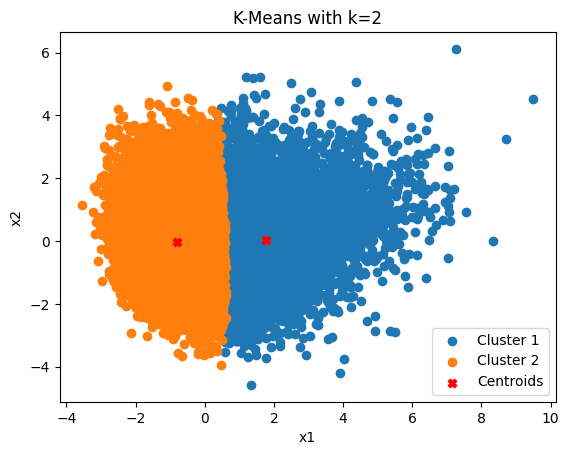

Genre of cluster 1: r&b
Genre of cluster 2: edm




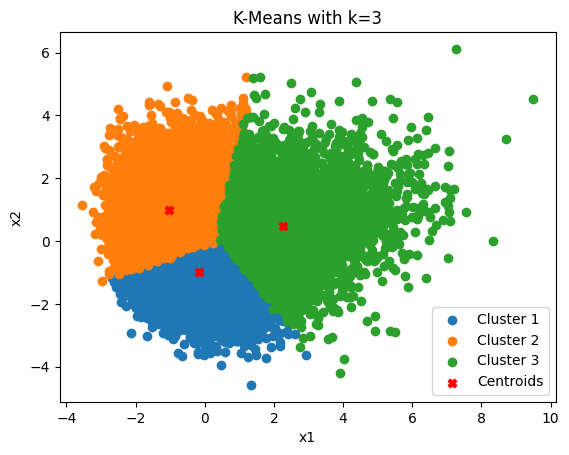

Genre of cluster 1: rap
Genre of cluster 2: edm
Genre of cluster 3: r&b




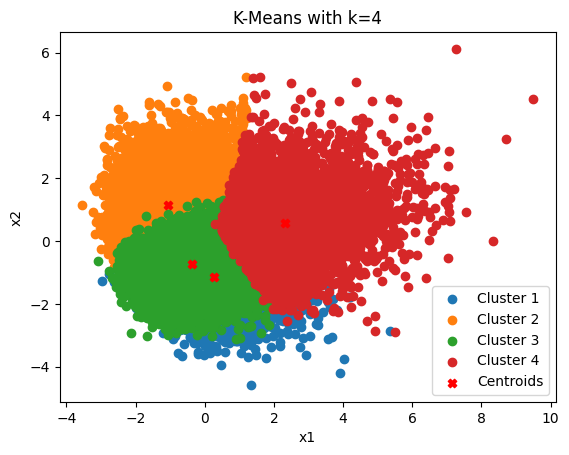

Genre of cluster 1: rap
Genre of cluster 2: edm
Genre of cluster 3: latin
Genre of cluster 4: r&b




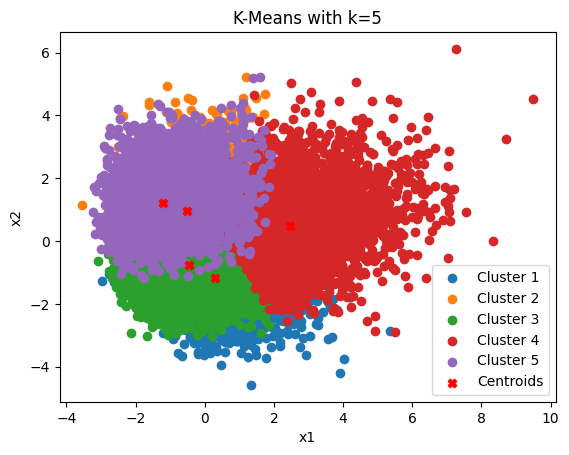

Genre of cluster 1: rap
Genre of cluster 2: rock
Genre of cluster 3: latin
Genre of cluster 4: r&b
Genre of cluster 5: edm




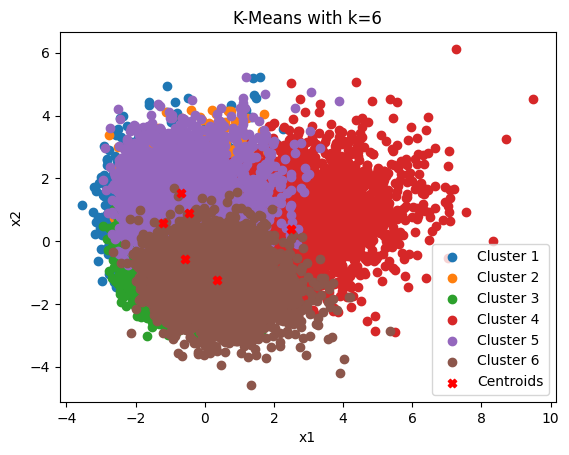

Genre of cluster 1: edm
Genre of cluster 2: rock
Genre of cluster 3: latin
Genre of cluster 4: r&b
Genre of cluster 5: edm
Genre of cluster 6: rap




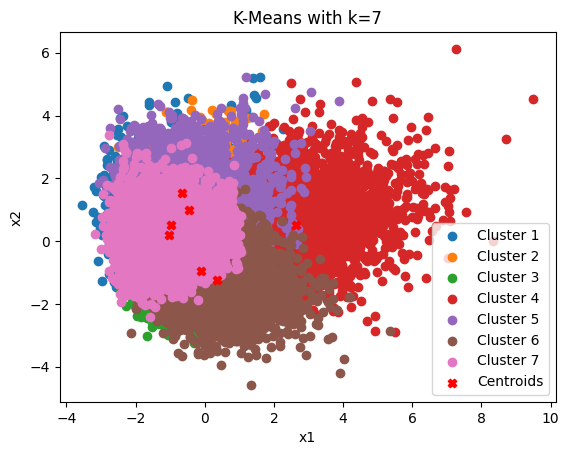

Genre of cluster 1: edm
Genre of cluster 2: rock
Genre of cluster 3: latin
Genre of cluster 4: r&b
Genre of cluster 5: edm
Genre of cluster 6: rap
Genre of cluster 7: edm




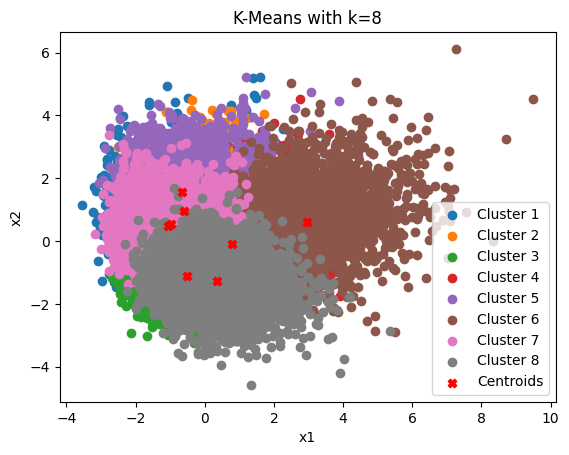

Genre of cluster 1: edm
Genre of cluster 2: rock
Genre of cluster 3: latin
Genre of cluster 4: r&b
Genre of cluster 5: edm
Genre of cluster 6: r&b
Genre of cluster 7: edm
Genre of cluster 8: rap




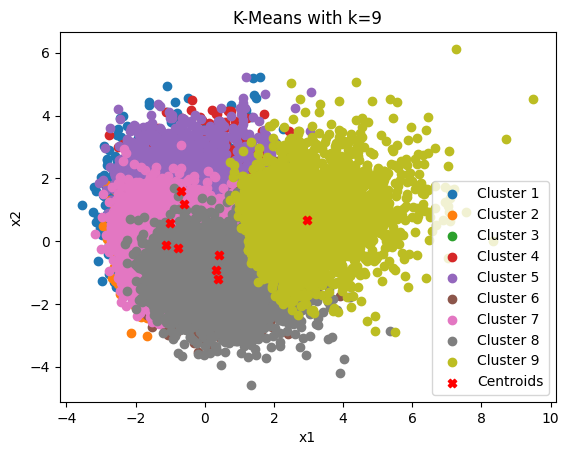

Genre of cluster 1: edm
Genre of cluster 2: edm
Genre of cluster 3: r&b
Genre of cluster 4: rock
Genre of cluster 5: edm
Genre of cluster 6: r&b
Genre of cluster 7: edm
Genre of cluster 8: rap
Genre of cluster 9: r&b




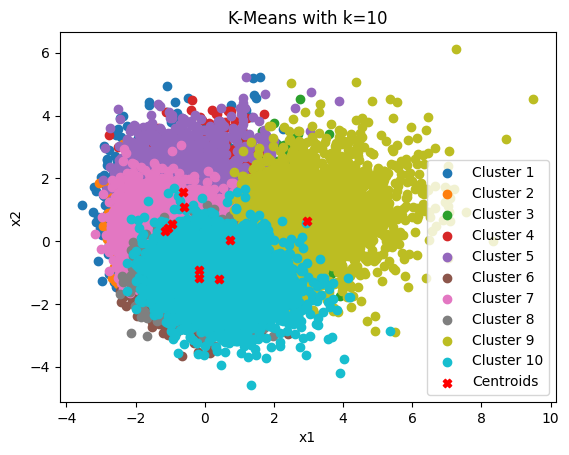

Genre of cluster 1: edm
Genre of cluster 2: edm
Genre of cluster 3: r&b
Genre of cluster 4: rock
Genre of cluster 5: edm
Genre of cluster 6: latin
Genre of cluster 7: edm
Genre of cluster 8: latin
Genre of cluster 9: r&b
Genre of cluster 10: rap




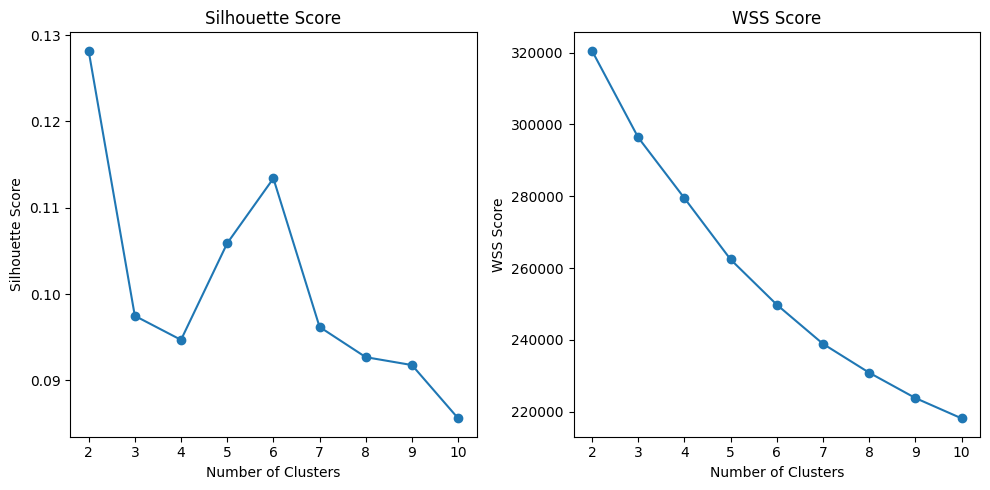

In [8]:
max_cluster_count = 10
# n_clusters starts from 2 because silhouette score is not defined for less
cluster_range = range(2, max_cluster_count + 1)
silhouette_scores, wss_scores = [], []
for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    final_centroids, final_cluster_indices = kmeans.fit(latent_data)
    visualize(latent_data, final_centroids, final_cluster_indices, n_clusters, "PCA")
    for i in range(n_clusters):
        most_frequent_genre = raw_data[final_cluster_indices == i]['playlist_genre'].value_counts().idxmax()
        print(f"Genre of cluster {i+1}: {most_frequent_genre}")
    print("\n")
    silhouette_scores.append(kmeans.calc_silhouette_score(latent_data))
    wss_scores.append(kmeans.calc_wss(latent_data))

    # you can use sklearn's silhouette score for faster calculations:
    # silhouette_scores.append(silhouette_score(latent_data, final_cluster_indices))

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

axes[0].plot(cluster_range, silhouette_scores, marker="o")
axes[0].set_xlabel("Number of Clusters")
axes[0].set_ylabel("Silhouette Score")
axes[0].set_title("Silhouette Score")

axes[1].plot(cluster_range, wss_scores, marker="o")
axes[1].set_xlabel("Number of Clusters")
axes[1].set_ylabel("WSS Score")
axes[1].set_title("WSS Score")

plt.tight_layout()
plt.show()

<div dir="rtl">
ÿ®ÿß ÿßÿ≥ÿ™ŸÅÿßÿØŸá ÿßÿ≤ ŸÜŸÖŸàÿØÿßÿ±Ÿáÿß€å ÿ±ÿ≥ŸÖ ÿ¥ÿØŸá ÿ™Ÿàÿ∂€åÿ≠ ÿØŸá€åÿØ ÿ®Ÿáÿ™ÿ±€åŸÜ k ÿ®ÿ±ÿß€å ÿßŸÜÿ™ÿÆÿßÿ® ÿØÿ± ÿØÿßÿØŸá ŸÖÿß ÿ®ÿß ÿßÿ≥ÿ™ŸÅÿßÿØŸá ÿßÿ≤ ÿßŸÑ⁄ØŸàÿ±€åÿ™ŸÖ K-Means ⁄Ü€åÿ≥ÿ™ÿü
⁄Üÿ±ÿßÿü
</div>

Selecting the optimal number of clusters for a clustering algorithm involves evaluating metrics like the silhouette score and WSS:
- silhouette score quantifies the similarity of data points within their assigned clusters, with a higher score indicating better clustering
- WSS measures the compactness of clusters by summing the squared distances between data points and their cluster centroids, with a lower score indicating better clustering

Our way of selection is to plot the silhouette score and WSS for various cluster numbers. Then we will select the point with highest silhouette score that also has a relatively low WSS. So for our case, we will select $k=6$.

*It also appears that we have 6 genres of music in this dataset :)

In [12]:
n_clusters = 6
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
final_centroids, final_cluster_indices = kmeans.fit(latent_data)

<div dir="rtl">
<h2>
ÿ®ÿ±ÿ±ÿ≥€å ÿÆÿ±Ÿàÿ¨€å</h2>
</div>

<div dir="rtl">
ÿØÿ± ÿß€åŸÜ ŸÇÿ≥ŸÖÿ™ ÿ®ÿ±ÿß€å ÿß€åŸÜ⁄©Ÿá ÿ®ÿ®€åŸÜ€åŸÖ ⁄ÜŸÇÿØÿ± ÿÆŸàÿ® ÿÆŸàÿ¥Ÿá ÿ®ŸÜÿØ€å ÿ±ÿß ÿßŸÜÿ¨ÿßŸÖ ÿØÿßÿØŸá ÿß€åŸÖ, ÿßÿ≤ €å⁄© ÿ±Ÿàÿ¥ sample check Ÿà ŸÜ€åÿ≤ TSNE ÿßÿ≥ÿ™ŸÅÿßÿØŸá ÿÆŸàÿßŸá€åŸÖ ⁄©ÿ±ÿØ.

</div>

<div dir="rtl">
ÿØÿ± ÿßÿ®ÿ™ÿØÿß ÿ®Ÿá ÿµŸàÿ±ÿ™ ÿ±ŸÜÿØŸàŸÖ ÿßÿ≤ Ÿáÿ± ÿÆŸàÿ¥Ÿá ÿØŸà ÿßŸáŸÜ⁄Ø ÿ±ÿß ÿßŸÜÿ™ÿÆÿßÿ® ⁄©ÿ±ÿØŸá (ÿ®ÿß ÿ™Ÿàÿ¨Ÿá ÿ®Ÿá ÿß€åŸÜ⁄©Ÿá ÿØÿ± ÿ®ÿÆÿ¥ ÿßŸàŸÑ ÿ®ÿß€åÿ≥ÿ™€å ÿßÿ≥ŸÖ ÿßŸáŸÜ⁄Ø ÿ±ÿß ŸÜ€åÿ≤ ŸÜ⁄ØŸá ŸÖ€åÿØÿßÿ¥ÿ™€åÿØ) Ÿà ÿ®ÿ®€åŸÜ€åÿØ ŸàÿßŸÇÿπÿß ÿß€åŸÜ ÿßŸáŸÜ⁄Ø Ÿáÿß ÿ®Ÿá ŸáŸÖ ŸÜÿ≤ÿØ€å⁄© Ÿáÿ≥ÿ™ŸÜÿØ €åÿß ÿÆ€åÿ±.
ŸÜ⁄©ÿ™Ÿá ÿß€åŸÜ⁄©Ÿá ÿµÿ±ŸÅÿß ÿ®ÿ±ÿ±ÿ≥€å ÿß€åŸÜ ÿπŸÖŸÑ ŸÜŸÖÿ±Ÿá ÿØÿßÿ±ÿØ Ÿà ŸÜ€åÿßÿ≤€å ÿ®Ÿá ÿÆ€åŸÑ€å ÿØŸÇ€åŸÇ ÿ®ŸàÿØŸÜ ÿÆÿ±Ÿàÿ¨€å ŸÜ€åÿ≥ÿ™.
</div>

Sampling two songs from each cluster shows that these songs are actually somewhat similar. 

In [13]:
# sampling two songs from each cluster
for i in range(n_clusters):
    samples = raw_data[final_cluster_indices == i].sample(n=2, random_state=42)
    display(samples)

track_popularity  danceability  energy  key  loudness  mode  \
25574              30.0         0.621   0.925  2.0    -2.933   1.0   
15907              18.0         0.677   0.696  4.0    -3.513   0.0   

       speechiness  acousticness  instrumentalness  liveness  ...  \
25574       0.0434       0.02380          0.000178     0.313  ...   
15907       0.1730       0.00435          0.233000     0.402  ...   

                     track_id                        track_name  \
25574  736yu2jFYlDQne9qmRmKEL                       Danger Zone   
15907  4OgmLJAMPDrT3Tc52iaw7Q  Higher Place - Bassjackers Remix   

                    track_artist          track_album_id  \
25574                    JETFIRE  2ry9mrAgvhN1hX3p7H9KPk   
15907  Dimitri Vegas & Like Mike  5Sv4IVbTyNbXPOhzI3qrby   

             track_album_name track_album_release_date  \
25574             Danger Zone               2019-05-03   
15907  Higher Place (Remixes)               2015-08-28   

                            playlist_name             playlist_id  \
25574  Epic Bass Drops | Best House Mixes  4IS7o1utOzhimFEFnj9gmu   
15907                   EDM - pop remixes  0cvVad4XizGbOS0vlwZYS5   

      playlist_genre          playlist_subgenre  
25574            edm  progressive electro house  
15907            edm                    pop edm  

[2 rows x 23 columns]

track_popularity  danceability  energy   key  loudness  mode  \
20226               2.0         0.500   0.899   4.0    -4.066   1.0   
26359              67.0         0.535   0.650  10.0    -6.328   1.0   

       speechiness  acousticness  instrumentalness  liveness  ...  \
20226       0.0736      0.000048          0.000198    0.0794  ...   
26359       0.0554      0.379000          0.000000    0.1400  ...   

                     track_id               track_name  track_artist  \
20226  5ZyXUaBaeZYAZqHxKX8cKL          Have A Nice Day      Bon Jovi   
26359  7GqWnsKhMtEW0nzki5o0d8  Killer Queen - 2011 Mix         Queen   

               track_album_id                                track_album_name  \
20226  3wNCxFmpRRaAQBUZij4fHM                                 Have A Nice Day   
26359  6RJyYMIrOtx3VnNIoq31kj  Sheer Heart Attack (Deluxe Remastered Version)   

      track_album_release_date       playlist_name             playlist_id  \
20226               2005-09-20   keg party jukebox  4PjiT7SWnUsTTTvKOuR76f   
26359               1974-11-08  Classic Rock Drive  37i9dQZF1DXdOEFt9ZX0dh   

      playlist_genre playlist_subgenre  
20226           rock    permanent wave  
26359           rock      classic rock  

[2 rows x 23 columns]

track_popularity  danceability  energy  key  loudness  mode  \
15511               4.0         0.680   0.867  7.0    -5.128   0.0   
3936               49.0         0.737   0.805  7.0    -6.106   0.0   

       speechiness  acousticness  instrumentalness  liveness  ...  \
15511       0.0437        0.0802          0.042300    0.0734  ...   
3936        0.2130        0.1220          0.000148    0.2590  ...   

                     track_id  track_name  track_artist  \
15511  4I1zD6WvoJoLDFWsqcCpMJ  I Want You        Ti√´sto   
3936   15tmP0QsT9Vv8eQBbj7ZZi     Pull Up         MEMBA   

               track_album_id track_album_name track_album_release_date  \
15511  4S7o1XHni9g71Sz3mHczx1       I Want You               2016-08-05   
3936   2pzQUy20fbPtB0li7GPYyv          Pull Up               2017-04-10   

                 playlist_name             playlist_id playlist_genre  \
15511  Jeff Seid Electro House  2Tisn6NZbeofpc57Oc6MGo            edm   
3936                Electropop  2Z5cPJ6Z4EVZAfF08amjvL            pop   

      playlist_subgenre  
15511     electro house  
3936         electropop  

[2 rows x 23 columns]

track_popularity  danceability  energy  key  loudness  mode  \
5274              33.0         0.683   0.732  7.0    -5.809   1.0   
2913               1.0         0.718   0.483  7.0    -9.353   1.0   

      speechiness  acousticness  instrumentalness  liveness  ...  \
5274       0.0585         0.670          0.000498    0.0782  ...   
2913       0.0320         0.719          0.000016    0.3230  ...   

                    track_id             track_name     track_artist  \
5274  1RRKcmND9EIJhhGYJwInBK              Rey Ticuz     Don Kalavera   
2913  0oVWKw4ZgoM51WXieVOE6Z  Echoes - Edeema Remix  Lauren Aquilina   

              track_album_id  track_album_name track_album_release_date  \
5274  51GFld6cAPdL60uw9CT18M         Rey Ticuz               2019-08-16   
2913  3U646aeMIHLwrKkRprTU6l  Echoes (Remixes)               2016-01-29   

             playlist_name             playlist_id playlist_genre  \
5274         Arena Hip-Hop  37i9dQZF1DWVFZbCNivv6B            rap   
2913  Chillout & Remixes üíú  4NlAd9NpIa92IjErMyAriM            pop   

     playlist_subgenre  
5274           hip hop  
2913   indie poptimism  

[2 rows x 23 columns]

track_popularity  danceability  energy  key  loudness  mode  \
1889              50.0         0.570   0.779  8.0    -7.850   1.0   
9994              34.0         0.596   0.833  2.0    -6.228   1.0   

      speechiness  acousticness  instrumentalness  liveness  ...  \
1889       0.0301      0.005250             0.891     0.367  ...   
9994       0.0300      0.000348             0.597     0.114  ...   

                    track_id          track_name  track_artist  \
1889  0VfUUuAT8TbTRKbRmlxMMo                 Ryo   Joris Voorn   
9994  2kLEHA4jUbmjpDWfSEOKv0  Night At The Opera          Kevu   

              track_album_id    track_album_name track_album_release_date  \
1889  380CczsK4Z1rVXkrVgnOPx                 Ryo               2019-05-10   
9994  7p4rAEJXhglLoYVPrkccNN  Night At The Opera               2019-08-30   

                                       playlist_name             playlist_id  \
1889  Deep Electronic Music 2020 & Progressive House  5CMvAWTlDPdZnkleiTHyyo   
9994              Big Room EDM - by Spinnin' Records  7xWdFCrU5Gka6qp1ODrSdK   

     playlist_genre          playlist_subgenre  
1889            edm  progressive electro house  
9994            edm                   big room  

[2 rows x 23 columns]

track_popularity  danceability  energy  key  loudness  mode  \
22104              69.0         0.769   0.596  7.0    -5.931   1.0   
24743              42.0         0.838   0.542  1.0    -6.884   0.0   

       speechiness  acousticness  instrumentalness  liveness  ...  \
22104       0.1110         0.137            0.0000     0.127  ...   
24743       0.0951         0.115            0.0075     0.374  ...   

                     track_id  track_name  track_artist  \
22104  668JOhJXCQeUkAsjfREN78      Cereza         Fuego   
24743  6oadMAqfdbOBvGib6lUpn3   Cocktales     Too $hort   

               track_album_id track_album_name track_album_release_date  \
22104  7z9yAQZ75kJXSVHHVov13s           Cereza               2019-11-08   
24743  0LM4X4sgT20NisqZWcNGgV        Cocktails               1995-01-23   

              playlist_name             playlist_id playlist_genre  \
22104             Trap Land  37i9dQZF1DXde9tuMHuIsj            rap   
24743  Minitruckin Playlist  0VVH2Nzj6kBVGK3WIUQMAw            rap   

      playlist_subgenre  
22104              trap  
24743  southern hip hop  

[2 rows x 23 columns]

<div dir="rtl">
ÿ®ÿß ÿßÿ≥ÿ™ŸÅÿßÿØŸá ÿßÿ≤ ÿß€åŸÜ T-SNE Ÿà ⁄©ÿßŸáÿ¥ ÿßÿ®ÿπÿßÿØ ÿ®Ÿá 2 ÿ®ÿπÿØ ŸÜÿ¥ÿßŸÜ ÿØŸá€åÿØ ⁄©Ÿá ÿß€åÿß ÿÆŸàÿ¥Ÿá ÿ®ŸÜÿØŸá ÿ®Ÿá ÿÆŸàÿ®€å ÿßŸÜÿ¨ÿßŸÖ ÿ¥ÿØŸá ÿßÿ≥ÿ™ €åÿß ÿÆ€åÿ±.

</br>
ÿØÿ± ÿµŸàÿ±ÿ™ Ÿæ€åÿßÿØŸá ÿ≥ÿßÿ≤€å ÿ™ÿßÿ®ÿπ tsne  ÿßÿ≤ ÿßÿ®ÿ™ÿØÿß, ŸÜŸÖÿ±Ÿá €å ÿßŸÖÿ™€åÿßÿ≤€å ÿ®Ÿá ÿ¥ŸÖÿß ÿ™ÿπŸÑŸÇ ÿÆŸàÿßŸáÿØ ⁄Øÿ±ŸÅÿ™.
</div>

The plot below shows an approximation of our clustring with $k=6$ in 2D space. As we can see it's better than visualizing with PCA and that's due to the non-linear transformation property of T-SNE compared to the linear transformation of PCA.

Based on the results, discernible patterns are observed in the areas corresponding to each cluster, indicating that the clustering has performed a decent job in capturing distinct groupings. 

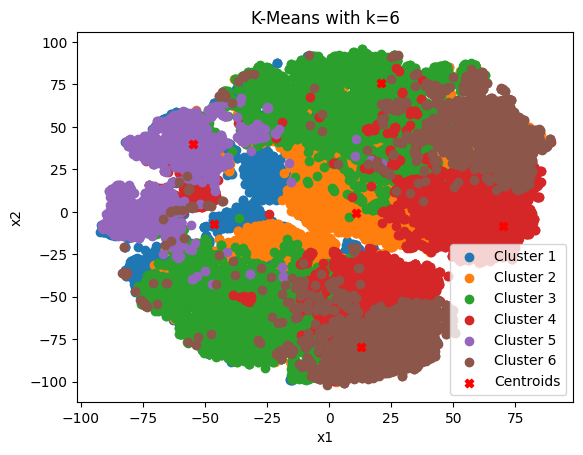

In [14]:
visualize(latent_data, final_centroids, final_cluster_indices, n_clusters, "TSNE")